In [1]:
import pandas as pd # for Data Manipulation
import matplotlib.pyplot as plt # for Visualization
import numpy as np #for Mathematical calculations
import seaborn as sns #for Advanced visualizations
crime = pd.read_csv("crime_data.csv")
crime.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1.0,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2.0,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3.0,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4.0,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5.0,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


Index(['sid', 'state', 'crime', 'murder', 'pctmetro', 'pctwhite', 'pcths',
       'poverty', 'single'],
      dtype='object')
State       0.000000
crime       2.921442
murder      5.722607
pctmetro   -0.426589
dtype: float64
State       -1.200000
crime       14.207323
murder      37.383084
pctmetro    -0.928537
dtype: float64


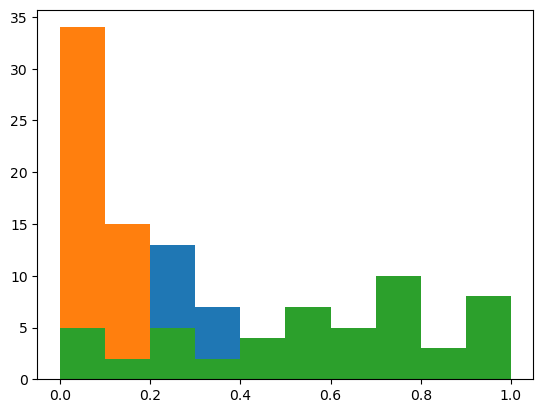

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the 'crime' DataFrame
# If not, load your dataset using: crime = pd.read_csv("your_dataset.csv")

# Display the original columns in the dataset
print(crime.columns)

# Create a new 'State' column and rearrange the DataFrame
crime['State'] = crime.iloc[:, 0]
crime = crime[['State', 'state', 'crime', 'murder', 'pctmetro']]  # Adjust column names accordingly

def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

# Select only numeric columns
numeric_columns = crime.select_dtypes(include=[np.number]).columns

# Normalized data frame (considering the numerical part of data)
df_norm = crime[numeric_columns].apply(norm_func)

# Univariate histograms
plt.hist(df_norm["crime"])
plt.hist(df_norm["murder"])
plt.hist(df_norm["pctmetro"])

# Display skewness and kurtosis
print(df_norm.skew(axis=0, skipna=True))
print(df_norm.kurtosis(axis=0, skipna=True))

plt.show()


In [3]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

[7.363125677833954,
 4.901870769300938,
 3.3486611906824657,
 2.365685429692602,
 1.883307381453747,
 1.603130080931139]

Text(0, 0.5, 'total_within_SS')

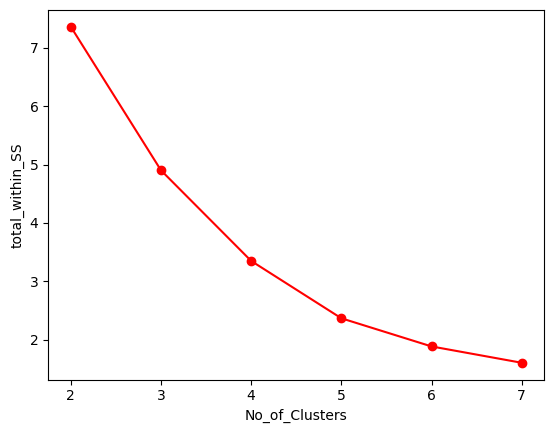

In [4]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [5]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df_norm is your normalized DataFrame
model = KMeans(n_clusters=4)
model.fit(df_norm)
crime['clust'] = model.labels_  # Assigning cluster labels to the 'clust' column

# Rearranging columns
crime = crime.iloc[:, [5, 0, 1, 2, 3, 4]]
crime.head()

# Correcting the column selection
numeric_columns = crime.columns[1:6]  # Assuming columns 1 through 5 are numeric

# Convert non-numeric values to NaN
crime[numeric_columns] = crime[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculating mean for each cluster (excluding non-numeric columns)
cluster_means = crime.groupby('clust')[numeric_columns].mean()

# Displaying the mean for each cluster
print(cluster_means)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           State  state        crime     murder    pctmetro
clust                                                      
0      11.850000    NaN   724.950000   9.020000   76.269999
1      38.294118    NaN   626.470588   7.729412   77.417647
2      29.769231    NaN   244.923077   4.215385   38.107692
3      51.000000    NaN  2922.000000  78.500000  100.000000
